In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss ## stat functions from scipy
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
def extract_data(path):
    adata = sc.read( path, validate=False)
    tmp = pd.DataFrame(adata.X.toarray())
    tmp.columns = adata.var_names.to_list()
    tmp.index = adata.obs_names.to_list()
    return tmp

In [3]:
ht_res = extract_data("Results/ht_res_scenic_integrated-output.loom")
ht_exh = extract_data("Results/ht_exh_scenic_integrated-output.loom")
mm_res = extract_data("Results/mm_res_scenic_integrated-output.loom")
mm_exh = extract_data("Results/mm_exh_scenic_integrated-output.loom")

dfs = {"ht_res": ht_res, "ht_exh":ht_exh,"mm_res":mm_res,"mm_exh":mm_exh}

In [4]:

def plot_mean_auc(TF):
    means = {}

    for k,v in dfs.items():
        try:
            means[k] = v[TF].mean()
        except:
            #print(f"{TF} missing in {k}")
            pass
    
    means_df = pd.DataFrame(means, index=[0])
    try:
        means_df.plot.bar()
        plt.title(TF + " avg activity")
    except:
        pass
    
def get_values(df, TF):
    tmp = pd.DataFrame(dfs[df][TF])
    tmp = tmp[TF].values
    tmp = tmp[tmp!=0]
    return tmp



def stat(df1, df2, TF):
    pair = (df1,df2)
    try:
        value1 = get_values(df1, TF)
        value2 = get_values(df2, TF)
    except:
        d = {'TF': [TF], df1: "missing value", df2: "",'p-value':"", 'test': ""}
        df = pd.DataFrame.from_dict(data=d, orient="columns")
        return df

    
         
    if ((ss.normaltest(value1)[1] < 0.05 and ss.normaltest(value2)[1] < 0.05) and (ss.bartlett(value2,value1)[1] > 0.05)):
        test = 't-test_ind'
        pvalue = ss.ttest_ind(value1, value2, nan_policy="omit", equal_var=True).pvalue 
        



    elif ((ss.normaltest(value1)[1] < 0.05 and ss.normaltest(value2)[1] < 0.05) and (ss.bartlett(value2,value1)[1] < 0.05)):
        test = 't-test_welch'
        pvalue = ss.ttest_ind(value1, value2, nan_policy="omit", equal_var=False).pvalue 
        


    else:
        test = 'Kruskal-Wallis'
        pvalue = ss.kruskal(value1, value2, nan_policy="omit").pvalue 


        
    if pvalue <= 1.00e-04:
        stars = '****'
    elif pvalue > 1.00e-04 and pvalue <= 1.00e-03:
        stars = '***'
    elif pvalue > 1.00e-03 and pvalue <= 1.00e-02:
        stars = '**'
    elif pvalue > 1.00e-02 and pvalue <= 5.00e-02:
        stars = '*'
    else:
        stars = 'np'
    d = {'TF': [TF], df1: [np.mean(value1)], df2: [np.mean(value2)],'p-value':[stars], 'test': [test]}
    df = pd.DataFrame.from_dict(data=d, orient="columns")

    return df

In [5]:
TFs=["MYC","BACH2","PRDM1","SPI1","SREBF1","STAT4","RUNX2","ZEB2","ZBTB32","EOMES","TBX21","NR3C1"]

## Differences exhausted resident in MM:

In [6]:
df = pd.DataFrame()

for TF in TFs:
    df = df.append(stat("mm_exh","mm_res", TF))

df.sort_values(by="p-value", ascending=False)

,TF,mm_exh,mm_res,p-value,test
0,PRDM1,1.78169,1.858676,np,t-test_welch
0,STAT4,1.439602,1.465508,np,t-test_welch
0,ZEB2,2.917385,2.981619,np,t-test_welch
0,EOMES,1.385965,1.415702,np,t-test_welch
0,TBX21,1.363922,1.406495,np,t-test_welch
0,NR3C1,1.946656,2.066131,**,t-test_welch
0,MYC,missing value,,,
0,BACH2,missing value,,,
0,SPI1,missing value,,,
0,SREBF1,missing value,,,


## Differences exhausted resident in healthy:

In [7]:
df = pd.DataFrame()

for TF in TFs:
    df = df.append(stat("ht_exh","ht_res", TF))

df.sort_values(by="p-value", ascending=False)

,TF,ht_exh,ht_res,p-value,test
0,PRDM1,1.072289,1.062857,np,t-test_ind
0,STAT4,1.120482,1.126307,np,t-test_ind
0,ZEB2,1.326347,1.309734,np,t-test_ind
0,EOMES,1.042253,1.096654,np,t-test_welch
0,TBX21,1.099291,1.160241,np,t-test_welch
0,NR3C1,1.067308,1.087087,np,t-test_ind
0,MYC,missing value,,,
0,BACH2,missing value,,,
0,SPI1,missing value,,,
0,SREBF1,missing value,,,


## Differences exhausted MM vs healthy:

In [8]:
df = pd.DataFrame()

for TF in TFs:
    df = df.append(stat("mm_exh","ht_exh", TF))

df.sort_values(by="p-value", ascending=False)

,TF,mm_exh,ht_exh,p-value,test
0,PRDM1,1.78169,1.072289,****,t-test_welch
0,STAT4,1.439602,1.120482,****,t-test_welch
0,ZEB2,2.917385,1.326347,****,t-test_welch
0,EOMES,1.385965,1.042253,****,t-test_welch
0,TBX21,1.363922,1.099291,****,t-test_welch
0,NR3C1,1.946656,1.067308,****,t-test_welch
0,MYC,missing value,,,
0,BACH2,missing value,,,
0,SPI1,missing value,,,
0,SREBF1,missing value,,,


## Differences resident MM vs healthy:

In [9]:
df = pd.DataFrame()

for TF in TFs:
    df = df.append(stat("mm_res","ht_res", TF))

df.sort_values(by="p-value", ascending=False)

,TF,mm_res,ht_res,p-value,test
0,PRDM1,1.858676,1.062857,****,t-test_welch
0,STAT4,1.465508,1.126307,****,t-test_welch
0,ZEB2,2.981619,1.309734,****,t-test_welch
0,EOMES,1.415702,1.096654,****,t-test_welch
0,TBX21,1.406495,1.160241,****,t-test_welch
0,NR3C1,2.066131,1.087087,****,t-test_welch
0,MYC,missing value,,,
0,BACH2,missing value,,,
0,SPI1,missing value,,,
0,SREBF1,missing value,,,


# Conclusions

- only difference exhausted vs resident is NR3C1 in MM (more active in resident NK cells)
- PRDM1, STAT4, ZEB2, EOMES, TBX21, NR3C1 more active in MM
- MYC, BACH2 active only in resident MM cells (look below)
- SPI2, SREBF1, RUNX2, ZBTB32 missing in all datasets, MISSING from the database or from the expression data?
- Try to impute counts before TF activity analysis?

## Average expressions

Values differs from statistical analysis because I kept the zeros to plot the activities

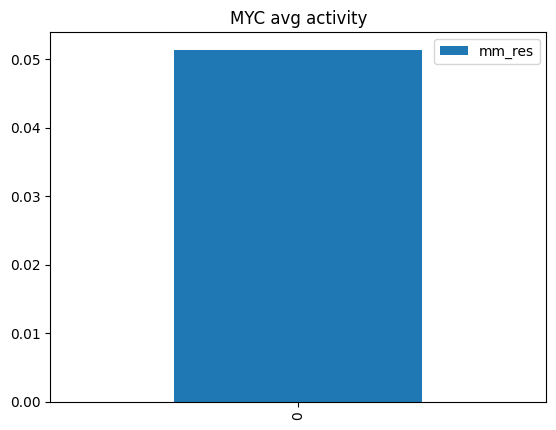

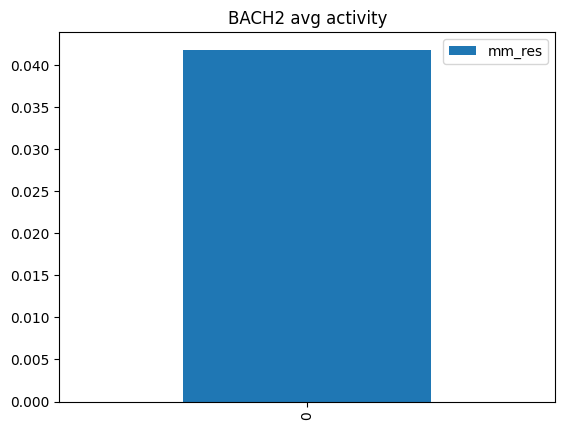

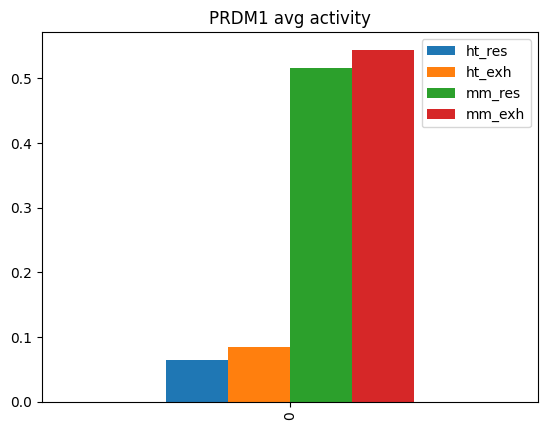

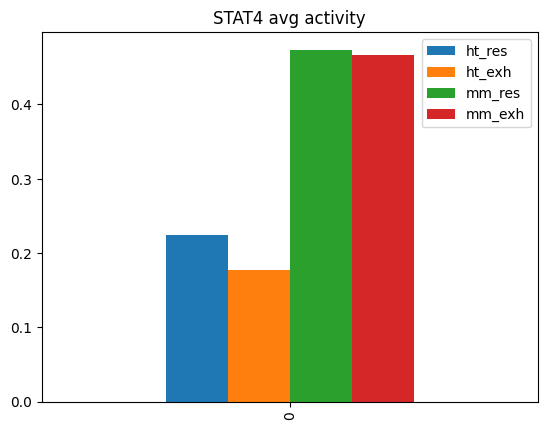

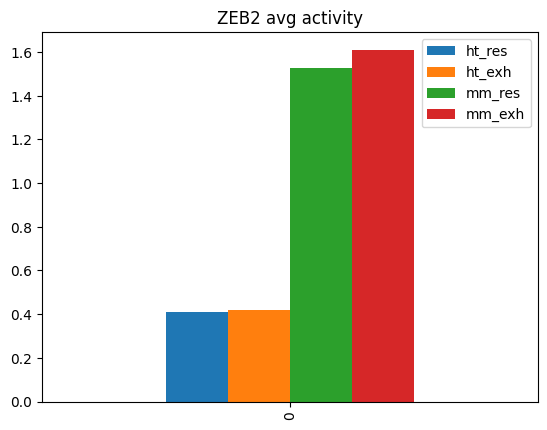

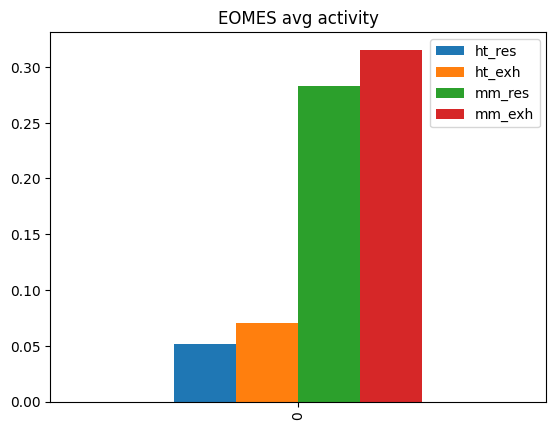

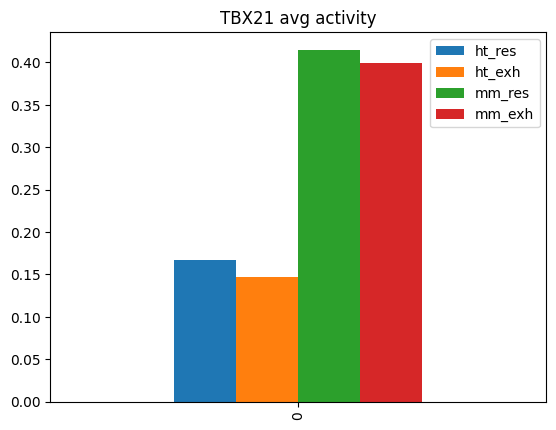

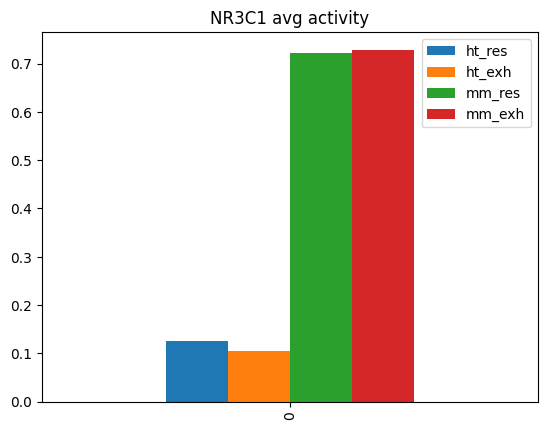

In [10]:
for TF in TFs:
    plot_mean_auc(TF)